# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
#import 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

/home/lion/.local/lib/python3.9/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

Importing a csv file which contains the training data

In [3]:
df.shape

(8763, 49)

The train data has 8763 rows and 49 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Using the info() method to obtain information about the dataframe i.e the columns in the dataframe,number of rows,
column data types,number of non-null values in each column,range index and memory usage

In [5]:
cat_variables = []
for j in df.columns:
    if 'wind_deg'  in df[j].name or 'pressure' in df[j].name:
        cat_variables.append(df[j].name)
        
cat_variables

['Valencia_wind_deg',
 'Bilbao_wind_deg',
 'Barcelona_wind_deg',
 'Seville_pressure',
 'Barcelona_pressure',
 'Bilbao_pressure',
 'Valencia_pressure',
 'Madrid_pressure']

Using a for loop to obtain all the categorical variables in our train dataset and storing them in a variable called
cat_variables

In [6]:
df[cat_variables].head()

Valencia_wind_deg  Bilbao_wind_deg  Barcelona_wind_deg Seville_pressure  \
0           level_5       223.333333           42.666667             sp25   
1          level_10       221.000000          139.000000             sp25   
2           level_9       214.333333          326.000000             sp25   
3           level_8       199.666667          273.000000             sp25   
4           level_7       185.000000          260.000000             sp25   

   Barcelona_pressure  Bilbao_pressure  Valencia_pressure  Madrid_pressure  
0         1036.333333      1035.000000        1002.666667       971.333333  
1         1037.333333      1035.666667        1004.333333       972.666667  
2         1038.000000      1036.000000        1005.333333       974.000000  
3         1037.000000      1036.000000        1009.000000       994.666667  
4         1035.000000      1035.333333                NaN      1035.333333

Viewing the type of values contained in the categorical features

In [7]:
df['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

Checking unique values in feature Valencia_wind_deg

In [8]:
df['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

Checking unique values in feature Seville_pressure

In [9]:
df['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 8760, 8761, 8762])

Checking unique values in feature Unnamed : 0

In [10]:
df.drop(columns = ['Unnamed: 0','Valencia_wind_deg','Seville_pressure'],inplace = True)

Removing the three features from the dataframe

In [11]:
df.shape

(8763, 46)

Confirming that the features have been dropped,by checking if the number of columns has dropped by 3

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [12]:
# look at data statistics
df.describe().T

count          mean           std          min  \
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.000000     75.000000  1.000000e+02  
Bilbao_wind_speed        0.666667      1.000000      2.666667  1.266667e+01  
Seville_clouds_all       0.000000      0

A summary statistics of each column in the dataframe.Mainly consists of:
    1.count - the number of non-null values in that column
    2.mean - The average of that column
    3.std - Standard deviation of that column
    4.min - The minimum value in that column
    5.25% - The lower quartile
    6.50% - median
    7.75% - The upper quartile
    8.max - The maximum value in that column

In [13]:
def plot_func(df):
    
    for col in df.columns:
        if df[col].dtype == float or df[col].dtype == int:
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
            mean=np.array(df[col]).mean()
            median=np.median(df[col])
            
            sns.boxplot(df[col], ax=ax_box)
            ax_box.axvline(mean, color='r', linestyle='--')
            ax_box.axvline(median, color='g', linestyle='-')
            
            sns.distplot(df[col], ax=ax_hist)
            ax_hist.axvline(mean, color='r', linestyle='--')
            ax_hist.axvline(median, color='g', linestyle='-')
            
            plt.legend({'Mean':mean,'Median':median})
            ax_box.set(xlabel='')
            plt.show()
            
            print('Skewness :',df[col].skew())
            print('Kurtosis :',df[col].kurtosis())
            
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3-q1
            print('Lower quartile ', q1)
            print('Upper quartile ', q3)
            print('Inter quartile range ', iqr)

            lower_whisker = q1 - (1.5 * iqr)
            upper_whisker = q3 + (1.5 * iqr)
            print('lower_whisker ', lower_whisker)
            print('upper_whisker', upper_whisker)

            print(np.array((np.where((df[col]<lower_whisker) | (df[col]>upper_whisker)))).shape)



A function that encapsules univariate analysis of each numerical variable.
In terms of graphical analysis it displays two plots:
    boxplot - One can be able to establish if a particular variable has outliers or not.
              More to that one is able to establish the mean,median upper quartile,lower quartile of each feature
    Distplot - It shows the distribution of each variable
In terms of non-graphical analysis one can be to tell:
    The skewness of each variable,
    The kurtosis
    Lower quartile,lower whisker,upper quartile,upper quartile  and interquartile range are quantified
    The last tuple displays how many data points are considered as outliers.

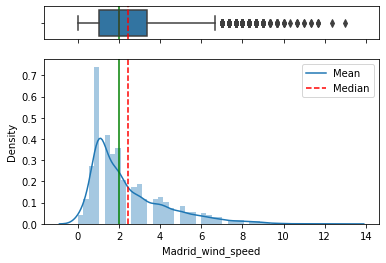

Skewness : 1.4411442292107193
Kurtosis : 2.0364621246675885
Lower quartile  1.0
Upper quartile  3.3333333333
Inter quartile range  2.3333333333
lower_whisker  -2.49999999995
upper_whisker 6.83333333325
(1, 307)


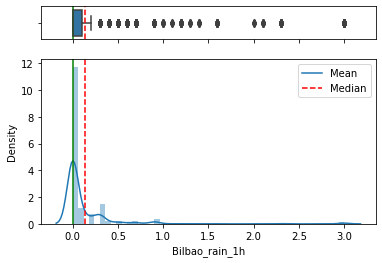

Skewness : 5.222801989732795
Kurtosis : 32.90465647123472
Lower quartile  0.0
Upper quartile  0.1
Inter quartile range  0.1
lower_whisker  -0.15000000000000002
upper_whisker 0.25
(1, 1576)


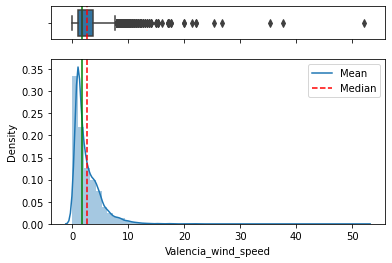

Skewness : 3.499636517325859
Kurtosis : 35.645426386267474
Lower quartile  1.0
Upper quartile  3.6666666667
Inter quartile range  2.6666666667
lower_whisker  -3.00000000005
upper_whisker 7.66666666675
(1, 327)


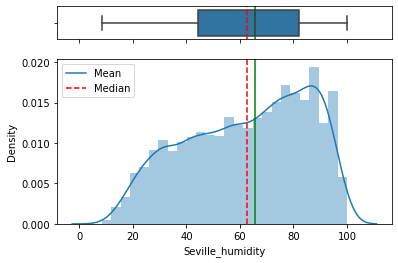

Skewness : -0.31017499809859467
Kurtosis : -1.017982770351452
Lower quartile  44.3333333333
Upper quartile  82.0
Inter quartile range  37.6666666667
lower_whisker  -12.166666666750011
upper_whisker 138.50000000005002
(1, 0)


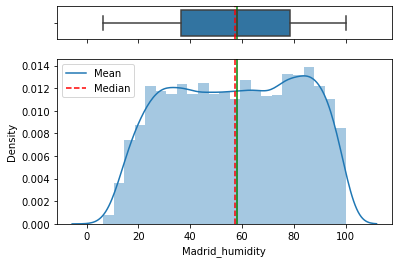

Skewness : -0.05737776957935216
Kurtosis : -1.167537310965867
Lower quartile  36.3333333333
Upper quartile  78.6666666667
Inter quartile range  42.3333333334
lower_whisker  -27.166666666800005
upper_whisker 142.16666666679998
(1, 0)


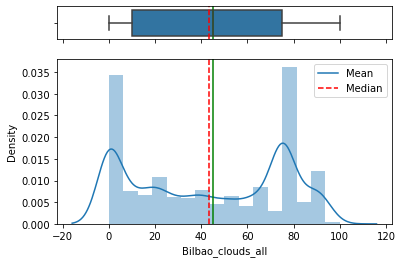

Skewness : -0.053085395425974256
Kurtosis : -1.5334170123998256
Lower quartile  10.0
Upper quartile  75.0
Inter quartile range  65.0
lower_whisker  -87.5
upper_whisker 172.5
(1, 0)


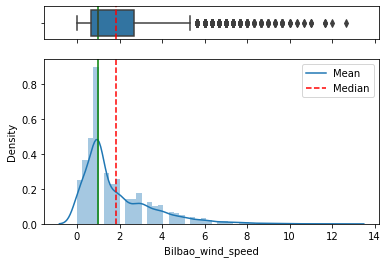

Skewness : 1.7169141154170686
Kurtosis : 3.6315653270441643
Lower quartile  0.6666666667
Upper quartile  2.6666666667
Inter quartile range  2.0
lower_whisker  -2.3333333333
upper_whisker 5.666666666699999
(1, 380)


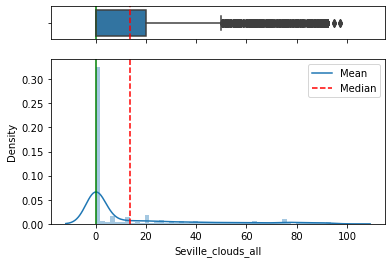

Skewness : 1.8144517925601304
Kurtosis : 2.1559210977967203
Lower quartile  0.0
Upper quartile  20.0
Inter quartile range  20.0
lower_whisker  -30.0
upper_whisker 50.0
(1, 1010)


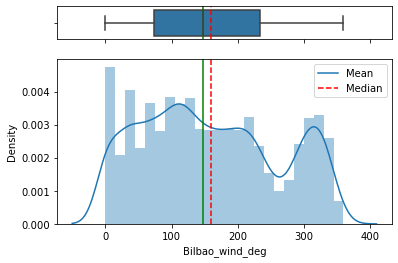

Skewness : 0.22692651432270444
Kurtosis : -1.0835298590634024
Lower quartile  73.3333333333
Upper quartile  234.0
Inter quartile range  160.6666666667
lower_whisker  -167.66666666675
upper_whisker 475.00000000005
(1, 0)


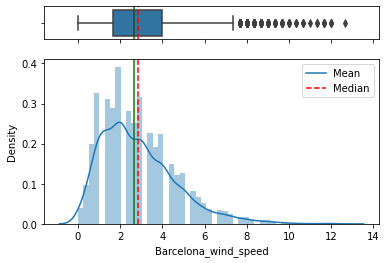

Skewness : 1.057330609573318
Kurtosis : 1.4936353085879928
Lower quartile  1.6666666667
Upper quartile  4.0
Inter quartile range  2.3333333332999997
lower_whisker  -1.8333333332499995
upper_whisker 7.499999999949999
(1, 180)


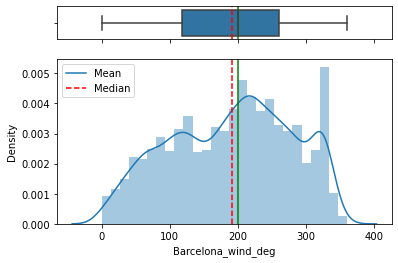

Skewness : -0.1800013211348048
Kurtosis : -0.9591599001218869
Lower quartile  118.16666666665
Upper quartile  260.0
Inter quartile range  141.83333333335
lower_whisker  -94.58333333337501
upper_whisker 472.750000000025
(1, 0)


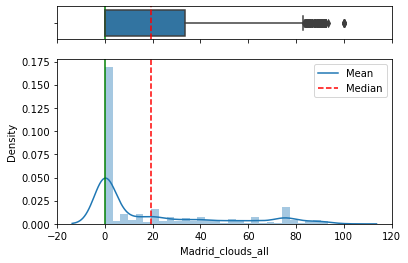

Skewness : 1.2467446252828802
Kurtosis : 0.14207863141425037
Lower quartile  0.0
Upper quartile  33.3333333333
Inter quartile range  33.3333333333
lower_whisker  -49.99999999994999
upper_whisker 83.33333333324998
(1, 310)


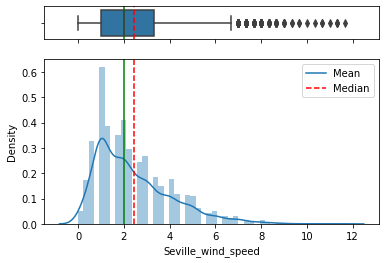

Skewness : 1.151005838368391
Kurtosis : 1.398579537584049
Lower quartile  1.0
Upper quartile  3.3333333333
Inter quartile range  2.3333333333
lower_whisker  -2.49999999995
upper_whisker 6.83333333325
(1, 186)


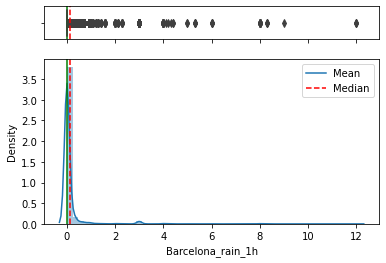

Skewness : 8.726987596141935
Kurtosis : 101.5789308218838
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 1297)


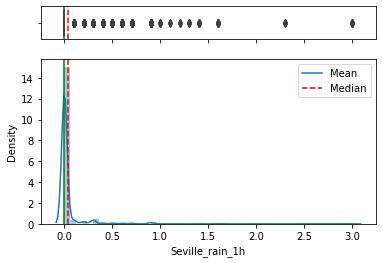

Skewness : 8.067341341966005
Kurtosis : 93.84074607373714
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 854)


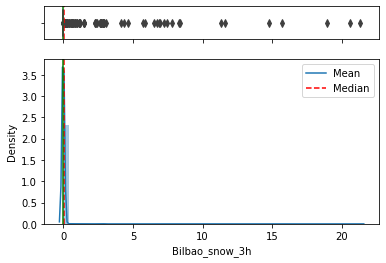

Skewness : 26.17756798977392
Kurtosis : 806.1284706376119
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 97)


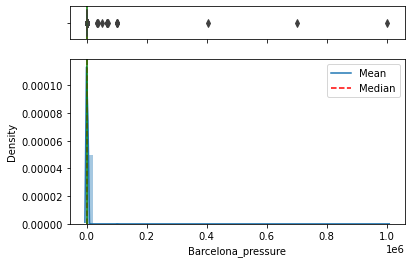

Skewness : 57.97966391220743
Kurtosis : 3687.5642300069417
Lower quartile  1014.0
Upper quartile  1022.0
Inter quartile range  8.0
lower_whisker  1002.0
upper_whisker 1034.0
(1, 349)


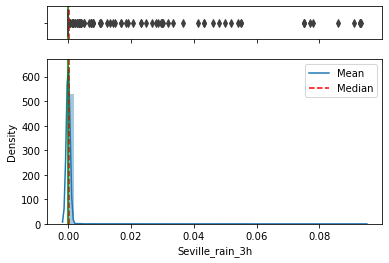

Skewness : 19.342573910601818
Kurtosis : 413.1365923500452
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 90)


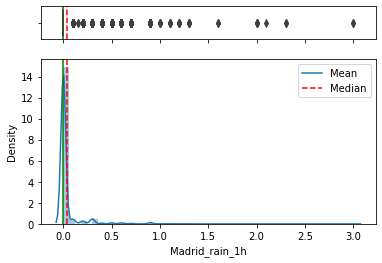

Skewness : 7.074307665706903
Kurtosis : 76.5844913665545
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 928)


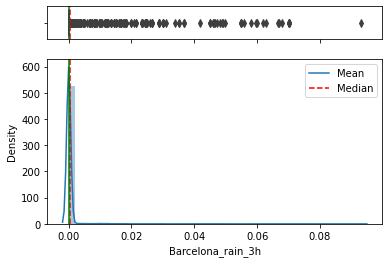

Skewness : 12.696605470731132
Kurtosis : 187.8004595033525
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 223)


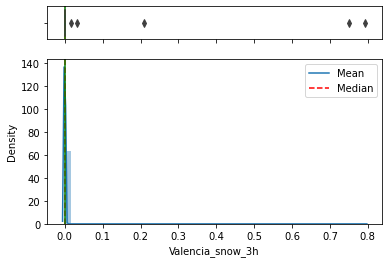

Skewness : 63.298084409477404
Kurtosis : 4089.323165482344
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 5)


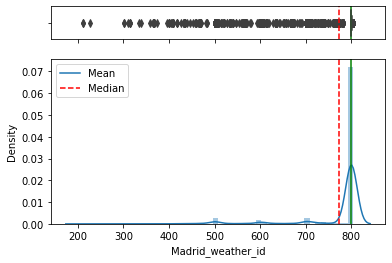

Skewness : -3.1077224640882264
Kurtosis : 9.25904651532839
Lower quartile  800.0
Upper quartile  800.6666666667
Inter quartile range  0.6666666667000527
lower_whisker  798.99999999995
upper_whisker 801.6666666667502
(1, 2385)


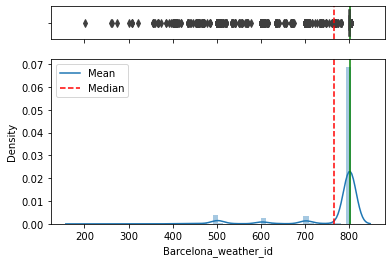

Skewness : -2.5840106243242724
Kurtosis : 5.701881572742422
Lower quartile  800.0
Upper quartile  801.0
Inter quartile range  1.0
lower_whisker  798.5
upper_whisker 802.5
(1, 2040)


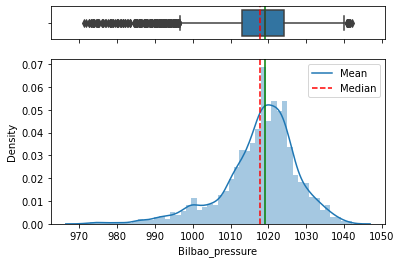

Skewness : -0.9996419604542528
Kurtosis : 1.8253225485015836
Lower quartile  1013.0
Upper quartile  1024.0
Inter quartile range  11.0
lower_whisker  996.5
upper_whisker 1040.5
(1, 365)


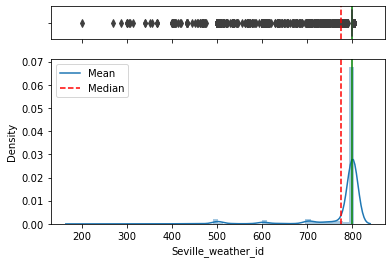

Skewness : -3.275574340057644
Kurtosis : 10.710308129580135
Lower quartile  800.0
Upper quartile  800.0
Inter quartile range  0.0
lower_whisker  800.0
upper_whisker 800.0
(1, 3484)


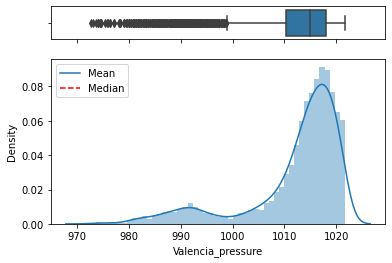

Skewness : -1.7051619012336132
Kurtosis : 2.21182335714847
Lower quartile  1010.3333333333
Upper quartile  1018.0
Inter quartile range  7.666666666700053
lower_whisker  998.8333333332498
upper_whisker 1029.50000000005
(1, 809)


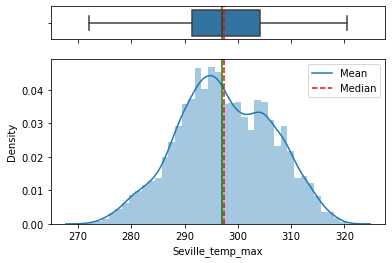

Skewness : -0.0339308264048835
Kurtosis : -0.5159894754947327
Lower quartile  291.31275000000005
Upper quartile  304.15
Inter quartile range  12.837249999999926
lower_whisker  272.05687500000016
upper_whisker 323.40587499999987
(1, 0)


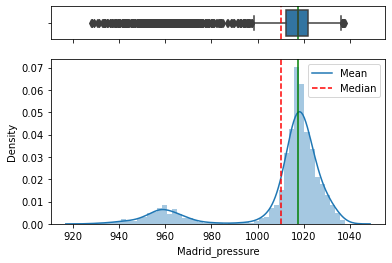

Skewness : -1.8507676181492347
Kurtosis : 2.216199344232205
Lower quartile  1012.3333333333
Upper quartile  1022.0
Inter quartile range  9.666666666700053
lower_whisker  997.8333333332498
upper_whisker 1036.50000000005
(1, 1303)


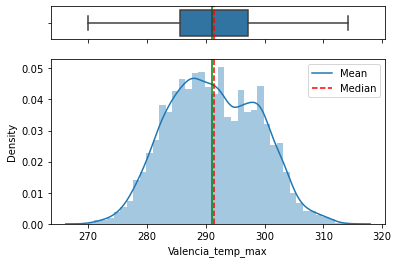

Skewness : 0.08267199320849858
Kurtosis : -0.6137547615408363
Lower quartile  285.55016666665
Upper quartile  297.24833333335
Inter quartile range  11.69816666669999
lower_whisker  268.0029166666
upper_whisker 314.7955833334
(1, 0)


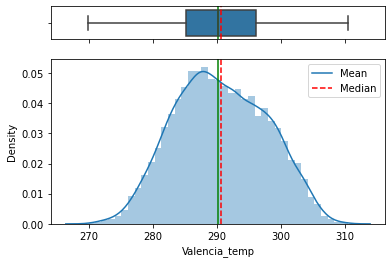

Skewness : 0.05747636574022998
Kurtosis : -0.6437930258670739
Lower quartile  285.15
Upper quartile  296.0566666667
Inter quartile range  10.906666666700005
lower_whisker  268.78999999994994
upper_whisker 312.41666666674996
(1, 0)


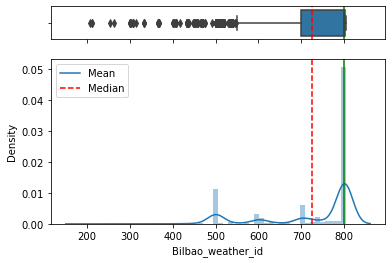

Skewness : -1.234843980657284
Kurtosis : 0.06781438947623064
Lower quartile  700.3333333333
Upper quartile  801.6666666667
Inter quartile range  101.3333333334001
lower_whisker  548.3333333331998
upper_whisker 953.6666666668002
(1, 1404)


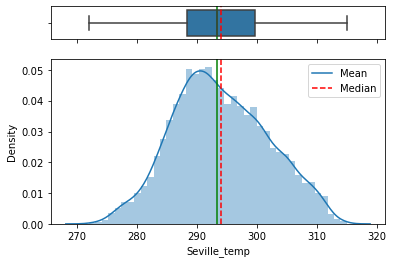

Skewness : 0.15723830205656178
Kurtosis : -0.5041322882243198
Lower quartile  288.28291666664995
Upper quartile  299.62033333335
Inter quartile range  11.33741666670005
lower_whisker  271.2767916665999
upper_whisker 316.6264583334001
(1, 0)


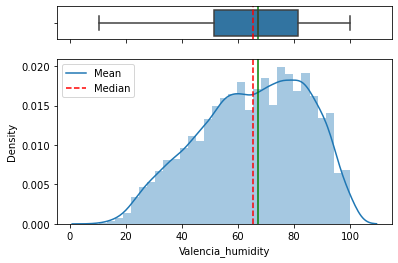

Skewness : -0.30575732882175444
Kurtosis : -0.7343454982297355
Lower quartile  51.3333333333
Upper quartile  81.3333333333
Inter quartile range  30.000000000000007
lower_whisker  6.333333333299983
upper_whisker 126.33333333330002
(1, 0)


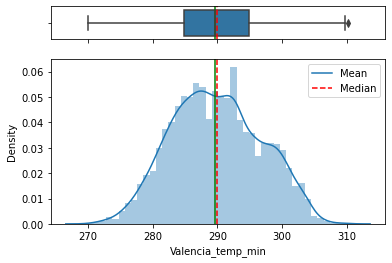

Skewness : 0.0818322233978733
Kurtosis : -0.5995506151499272
Lower quartile  284.7833333333
Upper quartile  294.82
Inter quartile range  10.0366666667
lower_whisker  269.72833333325
upper_whisker 309.87500000005
(1, 1)


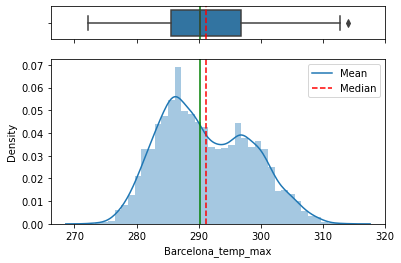

Skewness : 0.2769246414384882
Kurtosis : -0.728757385641762
Lower quartile  285.4833333333
Upper quartile  296.855
Inter quartile range  11.371666666700037
lower_whisker  268.4258333332499
upper_whisker 313.91250000005004
(1, 1)


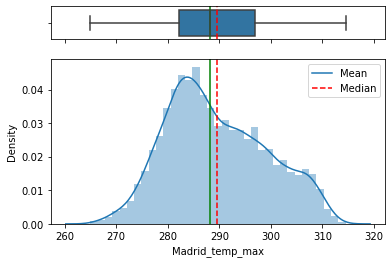

Skewness : 0.29870749813604114
Kurtosis : -0.6628611401473941
Lower quartile  282.15
Upper quartile  296.8166666667
Inter quartile range  14.666666666699996
lower_whisker  260.14999999994996
upper_whisker 318.81666666674994
(1, 0)


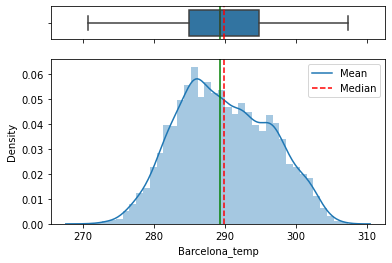

Skewness : 0.1280945706486536
Kurtosis : -0.6965548392192273
Lower quartile  284.97344270835003
Upper quartile  294.909
Inter quartile range  9.935557291649957
lower_whisker  270.0701067708751
upper_whisker 309.8123359374749
(1, 0)


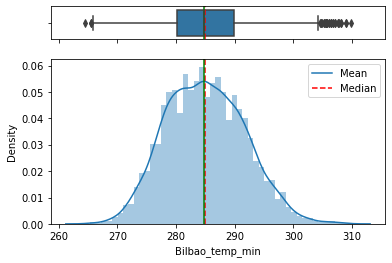

Skewness : 0.19491220408331122
Kurtosis : -0.2303421161293615
Lower quartile  280.08516666665
Upper quartile  289.8166666667
Inter quartile range  9.731500000049948
lower_whisker  265.4879166665751
upper_whisker 304.41391666677487
(1, 32)


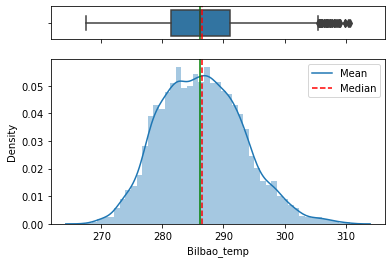

Skewness : 0.2936863815182865
Kurtosis : -0.0863625314948342
Lower quartile  281.37416666665
Upper quartile  291.03416666665
Inter quartile range  9.659999999999968
lower_whisker  266.88416666665006
upper_whisker 305.52416666664993
(1, 57)


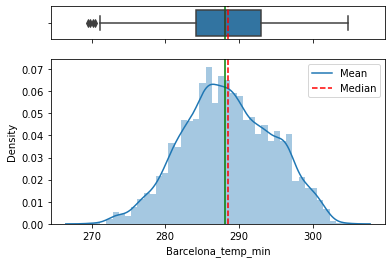

Skewness : -0.01805659274040252
Kurtosis : -0.47488983864511214
Lower quartile  284.15
Upper quartile  292.9666666667
Inter quartile range  8.81666666670003
lower_whisker  270.92499999994993
upper_whisker 306.19166666675005
(1, 4)


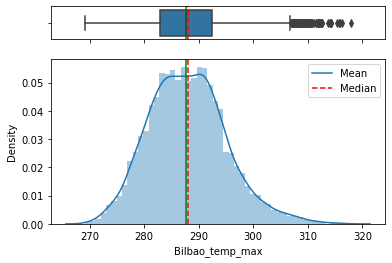

Skewness : 0.39393171665016424
Kurtosis : 0.2833664892986216
Lower quartile  282.83677604164996
Upper quartile  292.4833333333
Inter quartile range  9.646557291650026
lower_whisker  268.3669401041749
upper_whisker 306.953169270775
(1, 99)


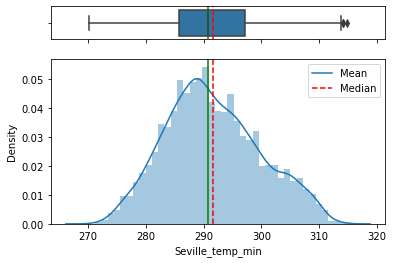

Skewness : 0.2654818767786141
Kurtosis : -0.47556416483549313
Lower quartile  285.8166666667
Upper quartile  297.15
Inter quartile range  11.333333333300004
lower_whisker  268.81666666674994
upper_whisker 314.14999999994996
(1, 3)


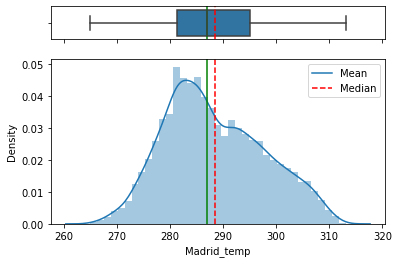

Skewness : 0.3041227308524655
Kurtosis : -0.612298600304205
Lower quartile  281.40428125
Upper quartile  295.15466666665
Inter quartile range  13.750385416649976
lower_whisker  260.778703125025
upper_whisker 315.7802447916249
(1, 0)


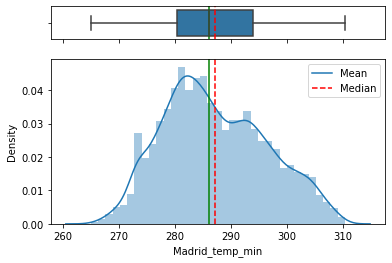

Skewness : 0.27508252382191245
Kurtosis : -0.6666462398271551
Lower quartile  280.29916666665
Upper quartile  293.8845
Inter quartile range  13.585333333349979
lower_whisker  259.921166666625
upper_whisker 314.26250000002494
(1, 0)


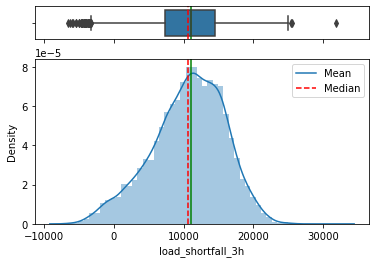

Skewness : -0.384847070902431
Kurtosis : -0.11899877049908492
Lower quartile  7390.3333333333
Upper quartile  14498.16666666665
Inter quartile range  7107.833333333349
lower_whisker  -3271.4166666667234
upper_whisker 25159.91666666667
(1, 50)


In [14]:
plot_func(df)

In [15]:
df['time'] =  pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Bilbao_rain_1h        8763 non-null   float64       
 3   Valencia_wind_speed   8763 non-null   float64       
 4   Seville_humidity      8763 non-null   float64       
 5   Madrid_humidity       8763 non-null   float64       
 6   Bilbao_clouds_all     8763 non-null   float64       
 7   Bilbao_wind_speed     8763 non-null   float64       
 8   Seville_clouds_all    8763 non-null   float64       
 9   Bilbao_wind_deg       8763 non-null   float64       
 10  Barcelona_wind_speed  8763 non-null   float64       
 11  Barcelona_wind_deg    8763 non-null   float64       
 12  Madrid_clouds_all     8763 non-null   float64       
 13  Seville_wind_speed

Converting time column from categorical to datetime 

<AxesSubplot:xlabel='time', ylabel='load_shortfall_3h'>

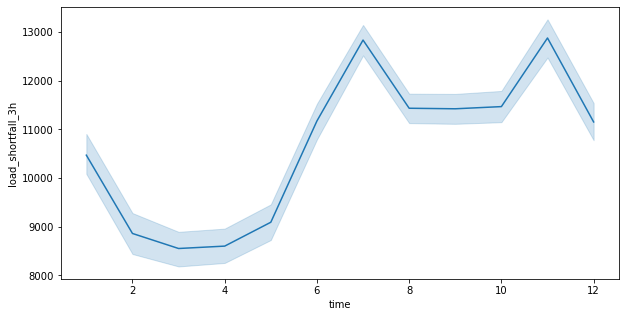

In [16]:
# plot relevant feature interactions
plt.figure(figsize = (10,5))
sns.lineplot(x = pd.DatetimeIndex(df['time']).month, y = 'load_shortfall_3h',data = df)

Observing the trend of target variable in various months

In [17]:
# evaluate correlation
df_corr = df.corr()
df_corr

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.259719             0.513092   
Bilbao_rain_1h                 0.259719        1.000000             0.265864   
Valencia_wind_speed            0.513092        0.265864             1.000000   
Seville_humidity              -0.117892        0.069878            -0.075227   
Madrid_humidity               -0.137092        0.106765            -0.019388   
Bilbao_clouds_all              0.244001        0.370733             0.210524   
Bilbao_wind_speed              0.377854        0.085398             0.386478   
Seville_clouds_all             0.191251        0.081131             0.163675   
Bilbao_wind_deg                0.270950        0.279350             0.248643   
Barcelona_wind_speed           0.294640        0.069997             0.347966   
Barcelona_wind_deg            -0.095380       -0.030723            -0.066071   
Madrid_clouds_all              0.230126        0.135524             0.221887   
Seville_wind_speed             0.434104        0.140101             0.316035   
Barcelona_rain_1h              0.062758        0.052558             0.031804   
Seville_rain_1h                0.108413        0.092984             0.046085   
Bilbao_snow_3h                 0.071183        0.096730             0.115133   
Barcelona_pressure             0.011134        0.052458             0.050282   
Seville_rain_3h                0.004795        0.016392             0.027637   
Madrid_rain_1h                 0.150446        0.187423             0.093865   
Barcelona_rain_3h             -0.014644       -0.001412            -0.037553   
Valencia_snow_3h               0.021660        0.008269             0.058629   
Madrid_weather_id             -0.169358       -0.147768            -0.099056   
Barcelona_weather_id          -0.099582       -0.120618            -0.037605   
Bilbao_pressure               -0.231747       -0.054814            -0.096374   
Seville_weather_id            -0.120014       -0.095723            -0.069092   
Valencia_pressure             -0.157088       -0.206765            -0.041408   
Seville_temp_max               0.050043       -0.210323            -0.024045   
Madrid_pressure               -0.136672       -0.298587            -0.158475   
Valencia_temp_max              0.133468       -0.135198             0.065815   
Valencia_temp                  0.128726       -0.127953             0.072366   
Bilbao_weather_id             -0.238128       -0.604616            -0.201379   
Seville_temp                   0.090861       -0.170009            -0.008508   
Valencia_humidity             -0.285787       -0.103868            -0.413017   
Valencia_temp_min              0.119657       -0.116835             0.075533   
Barcelona_temp_max             0.061854       -0.157326            -0.040998   
Madrid_temp_max                0.091464       -0.148397            -0.021970   
Barcelona_temp                 0.080133       -0.138901            -0.021456   
Bilbao_temp_min                0.077330       -0.141269            -0.010166   
Bilbao_temp                    0.060467       -0.182494            -0.022676   
Barcelona_temp_min             0.089992       -0.106593             0.001413   
Bilbao_temp_max                0.042114       -0.219871            -0.033271   
Seville_temp_min               0.110278       -0.120575             0.003618   
Madrid_temp                    0.109572       -0.135927            -0.011982   
Madrid_temp_min                0.098138       -0.116431            -0.019742   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   

                      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed            -0.117892        -0.137092           0.244001   
Bilbao_rain_1h                0.069878         0.106765           0.370733   
Valencia_wind_speed          -0.075227        -0.019388           0.210524   
Seville_humidity             

Checking how the variables are correlated with each other

Text(0.5, 1.0, 'Correlation Heatmap')

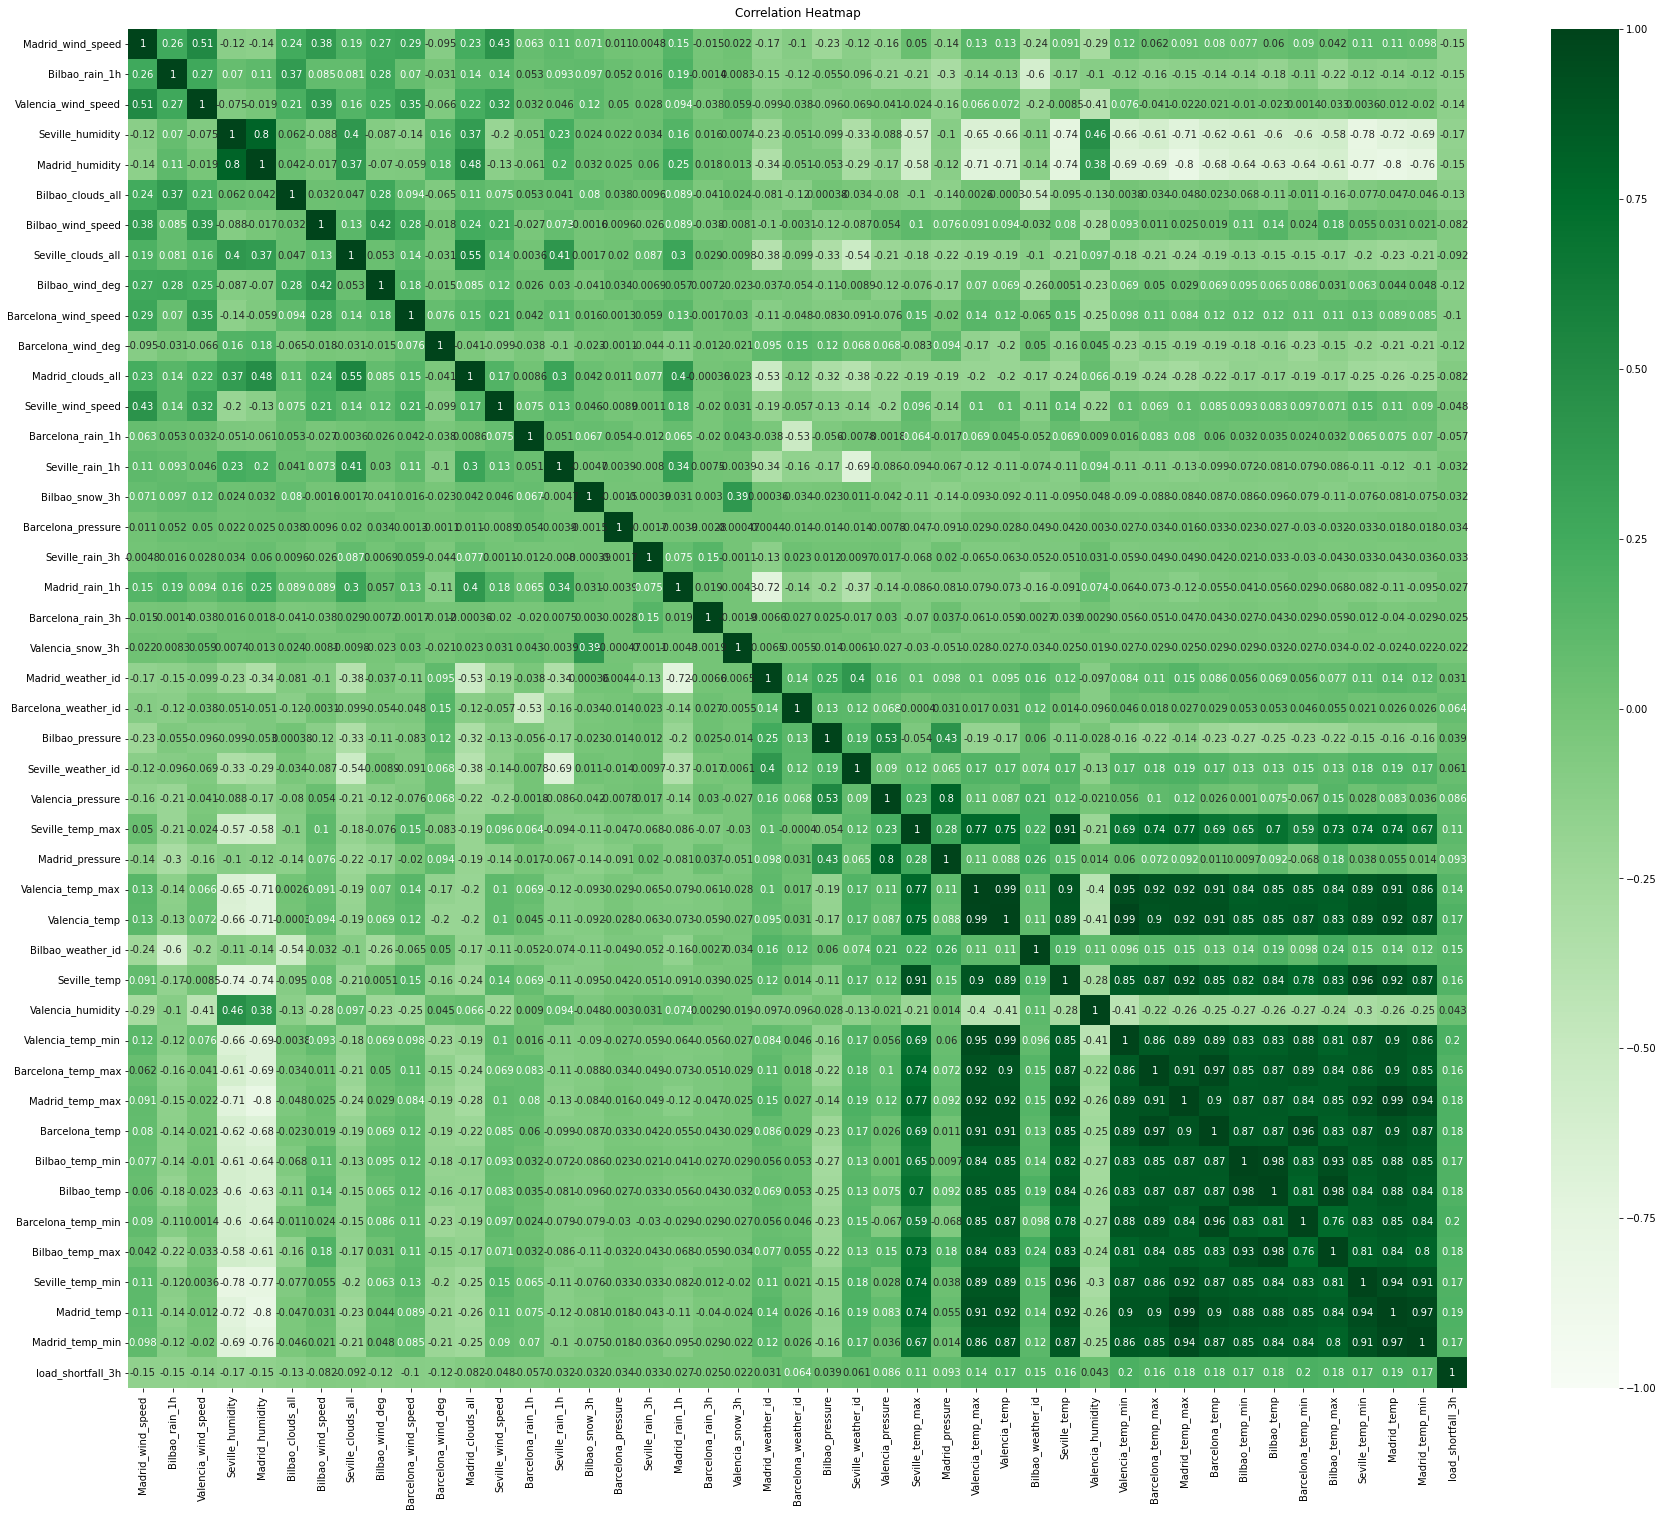

In [18]:
plt.figure(figsize=(30, 25))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df_corr,  vmin=-1,vmax=1, annot=True,cmap = 'Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [19]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [20]:
# remove missing values/ features
df['Valencia_pressure'].fillna(value = df['Valencia_pressure'].median(),inplace= True)
df.isnull().any().sum()

0

In [21]:
def outliers(df):
    
    for i in df.columns:
        
        if df[i].dtype == float or df[i].dtype == int: 
        
                median = df[i].median()

                q1 = df[i].quantile(0.25)
                q3 = df[i].quantile(0.75)
                iqr = q3-q1
                print(df[i].name)
                print('-------------')
                
                print('Lower quartile ', q1)
                print('Upper quartile ', q3)
                print('Inter quartile range ', iqr)

                lower_whisker = q1 - (1.5 * iqr)
                upper_whisker = q3 + (1.5 * iqr)
                print('lower_whisker ', lower_whisker)
                print('upper_whisker', upper_whisker)
                
                print('pre_skew',df[i].skew())
                print('pre_kurtosis',df[i].kurtosis())

                df[i] = np.where((df[i] < lower_whisker) | (df[i]>upper_whisker),df[i].median(),df[i])

                print(np.array((np.where((df[i]<lower_whisker) | (df[i]>upper_whisker)))).shape)
                print('skew',df[i].skew())
                print('kurtosis',df[i].kurtosis())
                print('\n')

The function looks for outliers in each numerical column and replaces the outliers with the median.
It also displays the lower quartile,upper quartile,IQR,current skew,current kurtosis,previous skew,
previous kurtosis just to confirm the outliers have been dealt with successfully.

In [22]:
outliers(df)

Madrid_wind_speed
-------------
Lower quartile  1.0
Upper quartile  3.3333333333
Inter quartile range  2.3333333333
lower_whisker  -2.49999999995
upper_whisker 6.83333333325
pre_skew 1.4411442292107193
pre_kurtosis 2.0364621246675885
(1, 0)
skew 1.0678090880777533
kurtosis 0.41872496274272075


Bilbao_rain_1h
-------------
Lower quartile  0.0
Upper quartile  0.1
Inter quartile range  0.1
lower_whisker  -0.15000000000000002
upper_whisker 0.25
pre_skew 5.222801989732795
pre_kurtosis 32.90465647123472
(1, 0)
skew 2.965426971310676
kurtosis 7.744630274777703


Valencia_wind_speed
-------------
Lower quartile  1.0
Upper quartile  3.6666666667
Inter quartile range  2.6666666667
lower_whisker  -3.00000000005
upper_whisker 7.66666666675
pre_skew 3.499636517325859
pre_kurtosis 35.645426386267474
(1, 0)
skew 1.0935784015895154
kurtosis 0.4720401797692828


Seville_humidity
-------------
Lower quartile  44.3333333333
Upper quartile  82.0
Inter quartile range  37.6666666667
lower_whisker  -12.1666

skew 0.05747636574022998
kurtosis -0.6437930258670739


Bilbao_weather_id
-------------
Lower quartile  700.3333333333
Upper quartile  801.6666666667
Inter quartile range  101.3333333334001
lower_whisker  548.3333333331998
upper_whisker 953.6666666668002
pre_skew -1.234843980657284
pre_kurtosis 0.06781438947623064
(1, 0)
skew -2.114051005346815
kurtosis 3.2983561828499246


Seville_temp
-------------
Lower quartile  288.28291666664995
Upper quartile  299.62033333335
Inter quartile range  11.33741666670005
lower_whisker  271.2767916665999
upper_whisker 316.6264583334001
pre_skew 0.15723830205656178
pre_kurtosis -0.5041322882243198
(1, 0)
skew 0.15723830205656178
kurtosis -0.5041322882243198


Valencia_humidity
-------------
Lower quartile  51.3333333333
Upper quartile  81.3333333333
Inter quartile range  30.000000000000007
lower_whisker  6.333333333299983
upper_whisker 126.33333333330002
pre_skew -0.30575732882175444
pre_kurtosis -0.7343454982297355
(1, 0)
skew -0.30575732882175444
kurt

In [23]:
# create new features
df['Year']= pd.DatetimeIndex(df['time']).year
df['Month']= pd.DatetimeIndex(df['time']).month
df['Day']= pd.DatetimeIndex(df['time']).day
df['Hour']= pd.DatetimeIndex(df['time']).hour

Creating new features from our time column.That is year,Month,Day,Hour.

In [24]:
# engineer existing features
df['month_sin'] = np.sin((df['Month']-1)*(2.*np.pi/df['Month'].max()))
df['month_cos'] = np.cos((df['Month']-1)*(2.*np.pi/df['Month'].max()))
df['day_sin'] = np.sin((df['Day']-1)*(2.*np.pi/df['Day'].max()))
df['day_cos'] = np.cos((df['Day']-1)*(2.*np.pi/df['Day'].max()))
df['hour_sin'] = np.sin((df['Hour']-1)*(2.*np.pi/df['Hour'].max()))
df['hour_cos'] = np.cos((df['Hour']-1)*(2.*np.pi/df['Hour'].max()))

Using cosine and sine functions to engineer other features from our newly created features 

In [25]:
df.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2015-01-01 03:00:00           0.666667             0.0             0.666667   
1 2015-01-01 06:00:00           0.333333             0.0             1.666667   
2 2015-01-01 09:00:00           1.000000             0.0             1.000000   
3 2015-01-01 12:00:00           1.000000             0.0             1.000000   
4 2015-01-01 15:00:00           1.000000             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Year  Month  Day  Hour  \
0                 0.0       223.333333  ...  2015      1    1     3   
1                 0.0       221.000000  ...  2015      1    1     6   
2                 0.0       214.333333  ...  2015      1    1     9   
3                 0.0       199.666667  ...  2015      1    1    12   
4                 0.0       185.000000  ...  2015      1    1    15   

   month_sin  month_cos  day_sin  day_cos  hour_sin  hour_cos  
0        0.0        1.0      0.0      1.0  0.563320  0.826239  
1        0.0        1.0      0.0      1.0  0.997204  0.074730  
2        0.0        1.0      0.0      1.0  0.680173 -0.733052  
3        0.0        1.0      0.0      1.0 -0.149042 -0.988831  
4        0.0        1.0      0.0      1.0 -0.866025 -0.500000  

[5 rows x 56 columns]

In [26]:
cols_to_drop = ['time','Month','Day','Hour']

In [27]:
df.drop(columns = cols_to_drop,inplace = True)

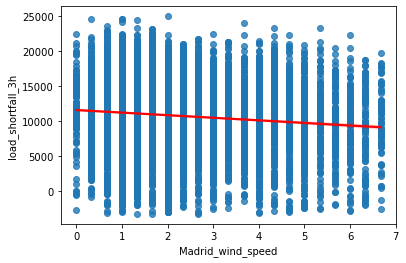

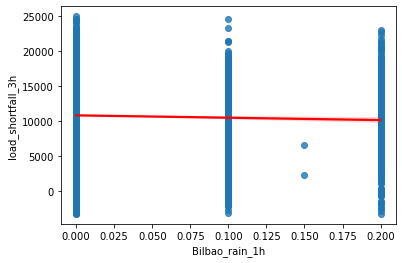

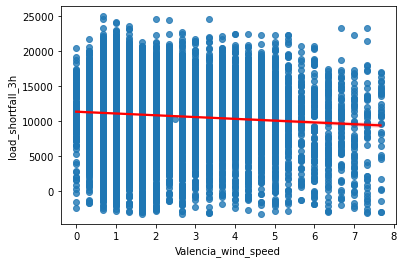

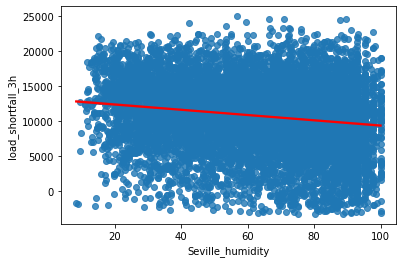

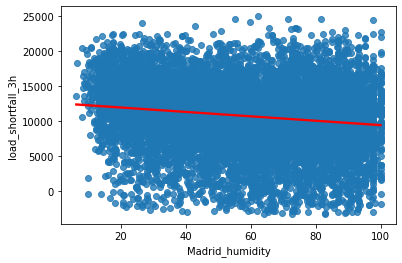

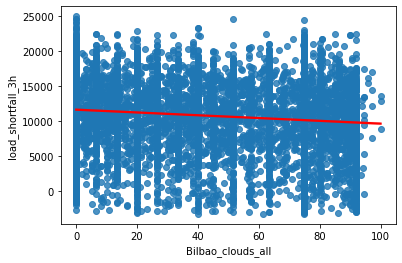

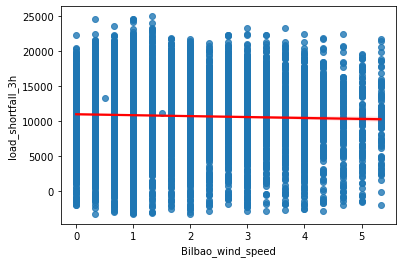

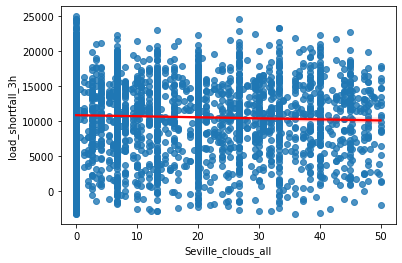

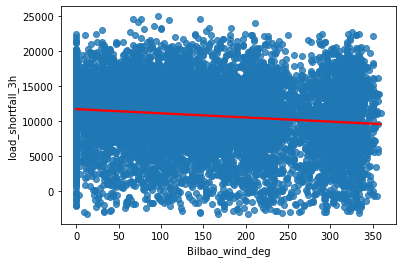

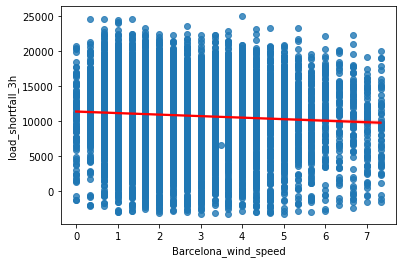

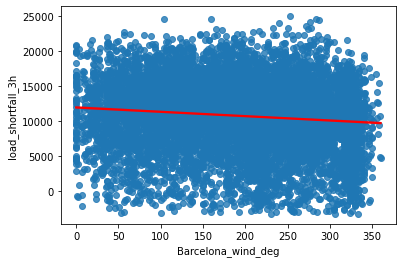

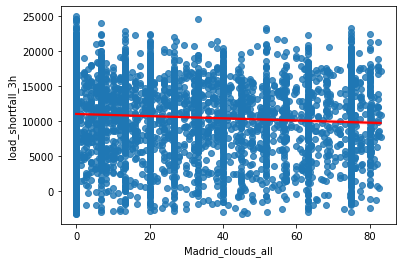

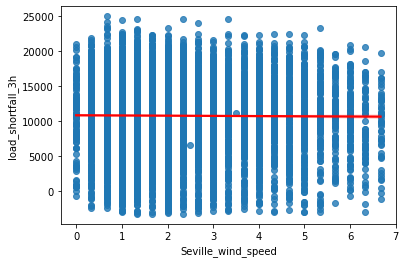

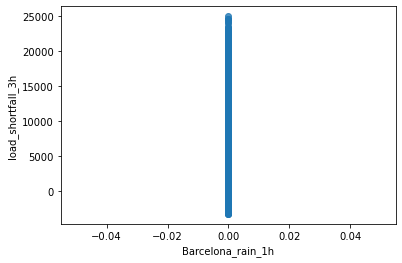

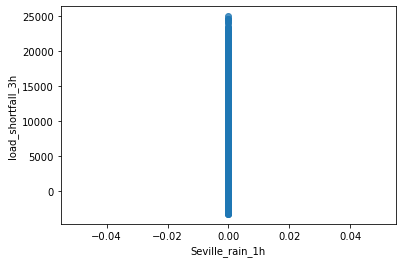

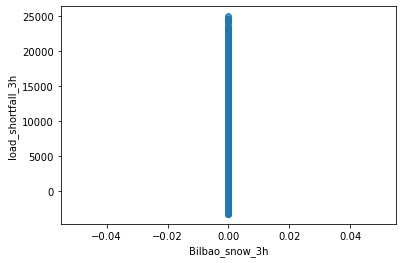

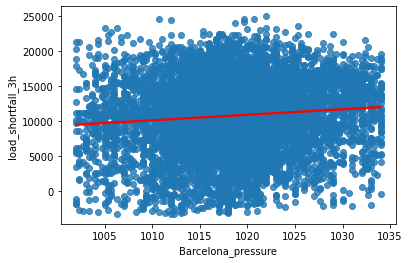

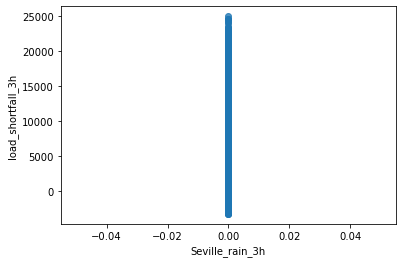

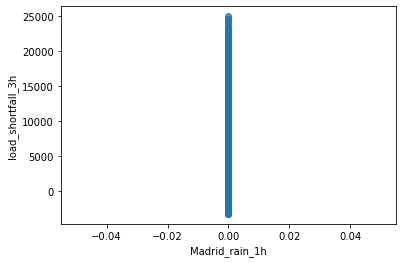

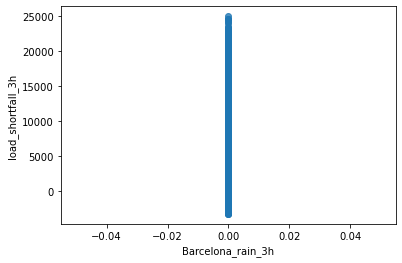

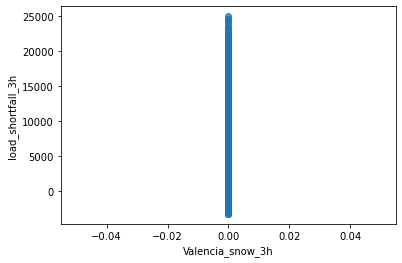

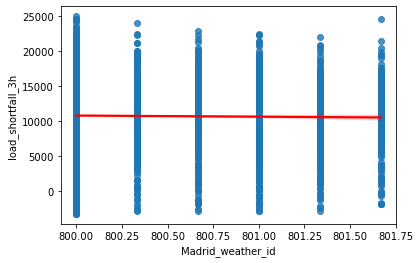

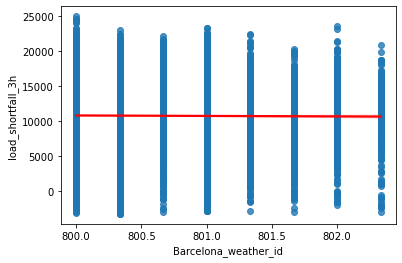

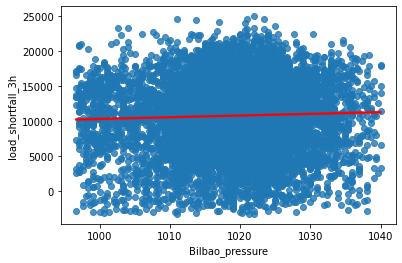

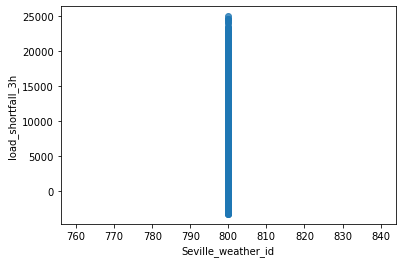

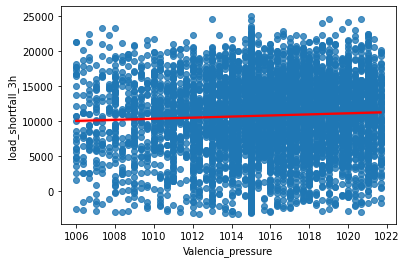

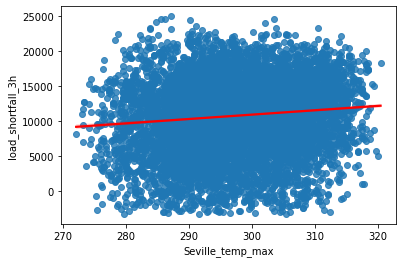

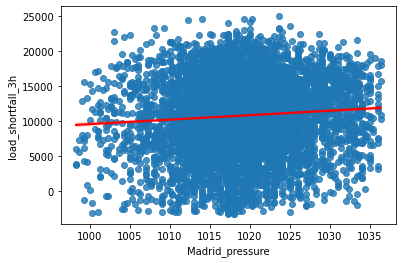

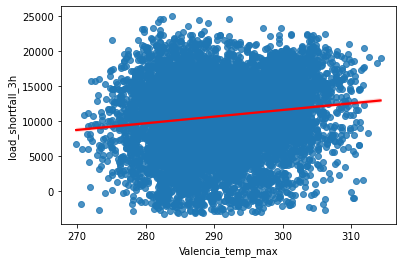

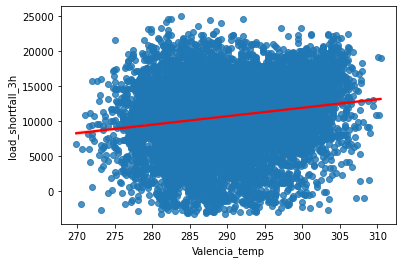

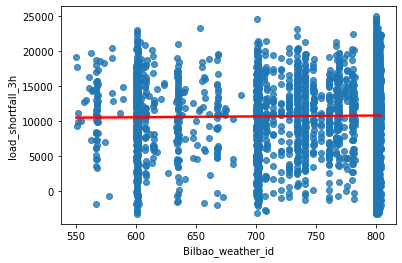

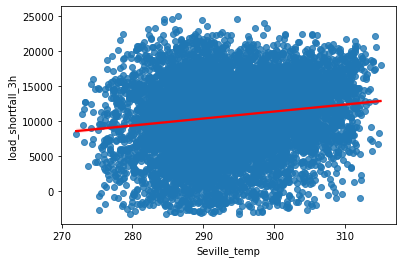

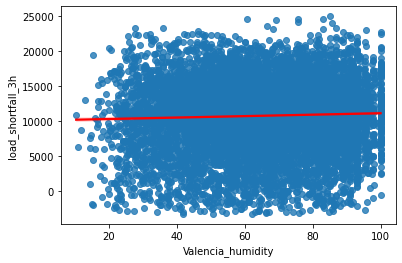

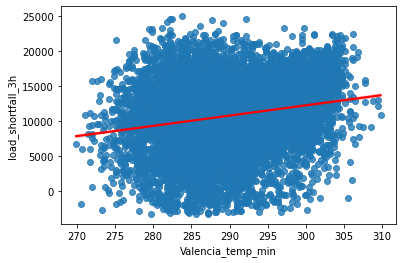

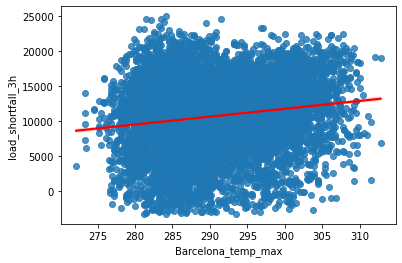

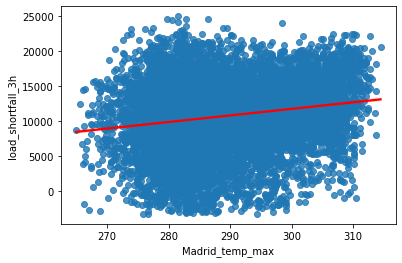

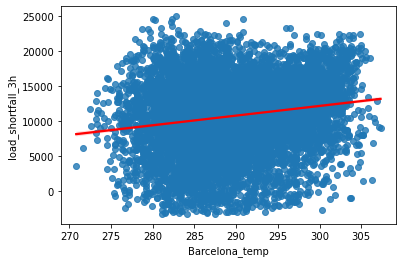

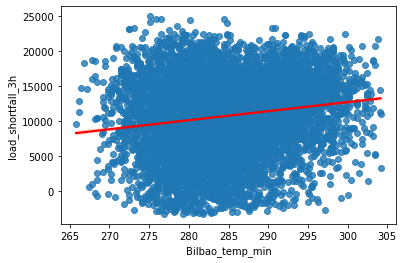

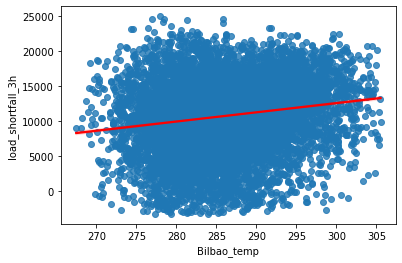

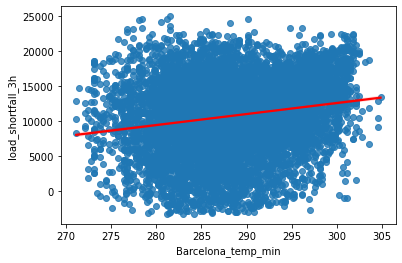

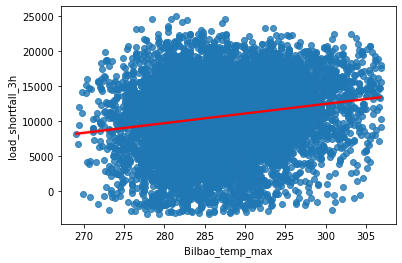

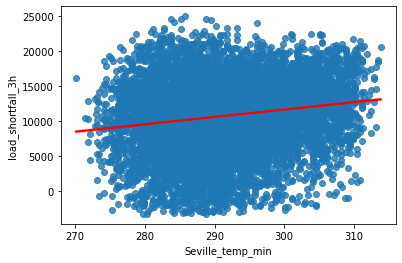

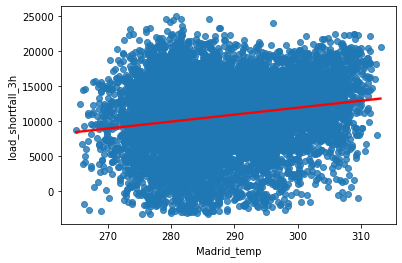

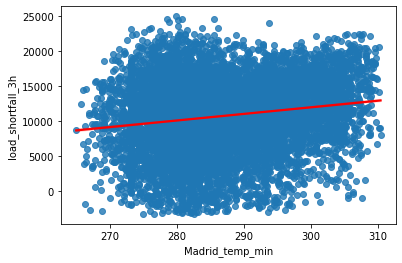

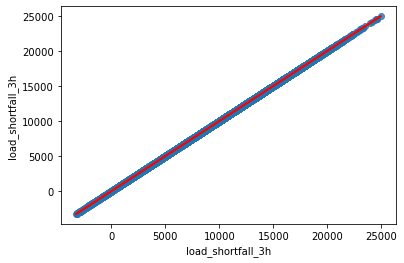

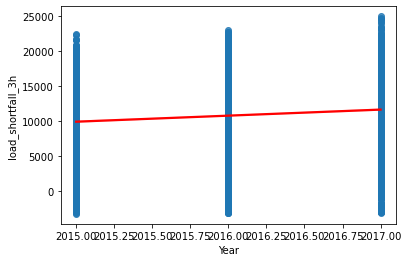

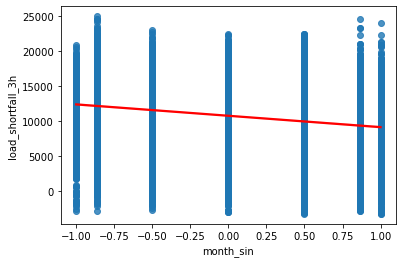

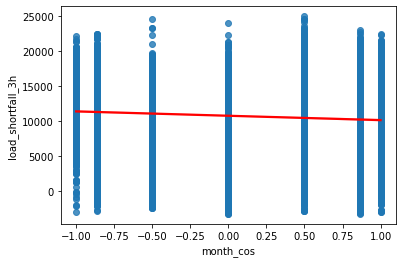

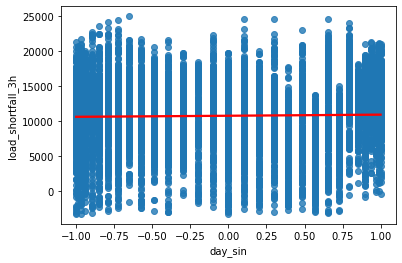

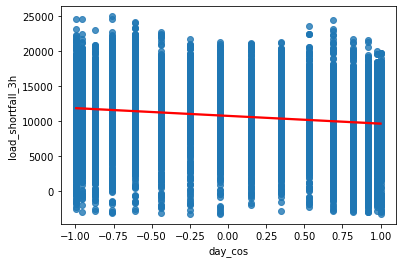

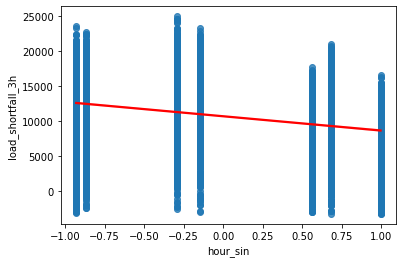

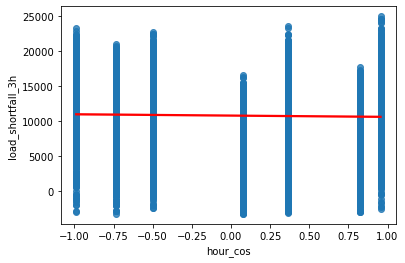

In [28]:
#checking for linearlity
for i in df.columns:
#     fig, axs = plt.subplots(figsize=(5,5))
#     axs.set_title("{} vs. load_shortfall_3h".format(df[i].name),fontsize=10)
#     sns.regplot(x=df[i],y=df['load_shortfall_3h'],color='blue',edgecolor='k')
     sns.regplot(x=df[i],y=df['load_shortfall_3h'],data = df,line_kws={"color": "red"})
     plt.show()

In [29]:
from statsmodels.formula.api import ols

In [30]:
y_name = 'load_shortfall_3h'

X_names = [col for col in df.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Year + month_sin + month_cos + day_sin + day_cos + hour_sin + hour_cos


In [31]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=df)
fitted = model.fit()

In [32]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     71.39
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:44:07   Log-Likelihood:                -85910.
No. Observations:                8763   AIC:                         1.719e+05
Df Residuals:                    8719   BIC:                         1.722e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3007 

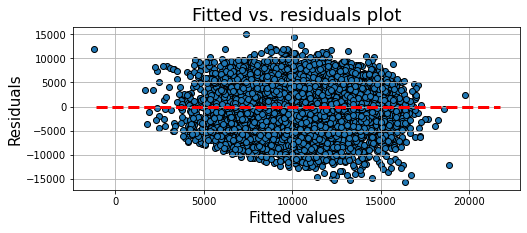

In [33]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [34]:
#CHECKING FOR NORMALITY

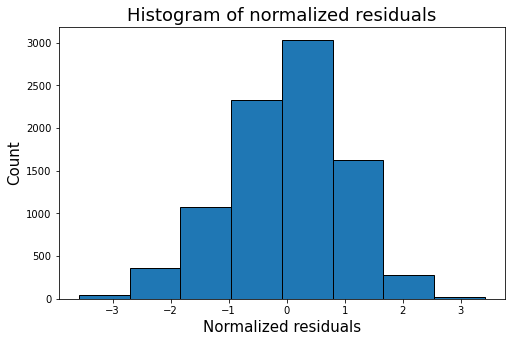

In [35]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [36]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

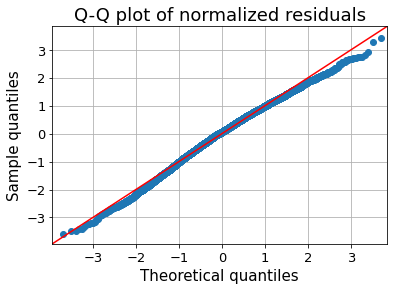

In [37]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [38]:
# create targets and features dataset
X = df.drop('load_shortfall_3h', axis=1)
y = df['load_shortfall_3h']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -1.035300       -0.339825            -0.946917          0.516117   
1          -1.258449       -0.339825            -0.352722          0.692953   
2          -0.812152       -0.339825            -0.748852          0.383491   
3          -0.812152       -0.339825            -0.748852          0.118238   
4          -0.812152       -0.339825            -0.748852         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.466100           -0.473295   
1         0.298017          -1.335491          -0.466100           -0.473295   
2         0.284319          -1.335491          -0.466100           -0.473295   
3        -0.044439          -1.335491          -0.466100           -0.473295   
4        -0.017043          -1.274045          -0.993463           -0.473295   

   Bilbao_wind_deg  Barcelona_wind_speed  ...  Seville_temp_min  Madrid_temp  \
0         0.630823              2.279492  ...         -2.126946    -2.405393   
1         0.607959              0.796577  ...         -2.042418    -2.357388   
2         0.542632             -0.474494  ...         -1.571372    -1.680968   
3         0.398912             -0.262649  ...         -0.762991    -0.698057   
4         0.255192              1.008422  ...         -0.748332    -0.828246   

   Madrid_temp_min      Year  month_sin  month_cos   day_sin   day_cos  \
0        -2.309892 -1.226179   0.004427   1.420596 -0.006616  1.451283   
1        -2.261154 -1.226179   0.004427   1.420596 -0.006616  1.451283   
2        -1.574407 -1.226179   0.004427   1.420596 -0.006616  1.451283   
3        -0.576488 -1.226179   0.004427   1.420596 -0.006616  1.451283   
4        -0.708665 -1.226179   0.004427   1.420596 -0.006616  1.451283   

   hour_sin  hour_cos  
0  0.897127  0.964072  
1  1.546155 -0.060979  
2  1.071922 -1.162787  
3 -0.168464 -1.511667  
4 -1.240968 -0.844906  

[5 rows x 51 columns]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [42]:
# create one or more ML models
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
b0 = float(lm.intercept_)
b0

10437.14014265485

In [44]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff

Coefficient
Madrid_wind_speed    -3.433533e+02
Bilbao_rain_1h       -1.109639e+02
Valencia_wind_speed  -3.173120e+02
Seville_humidity     -2.473679e+02
Madrid_humidity       6.862328e+01
Bilbao_clouds_all    -2.987566e+02
Bilbao_wind_speed    -2.385952e+02
Seville_clouds_all    5.846916e+01
Bilbao_wind_deg      -3.167316e+02
Barcelona_wind_speed -1.298578e+02
Barcelona_wind_deg   -3.256632e+01
Madrid_clouds_all     5.756036e+01
Seville_wind_speed   -7.991037e+01
Barcelona_rain_1h    -7.730705e-12
Seville_rain_1h       5.002221e-12
Bilbao_snow_3h       -4.206413e-12
Barcelona_pressure   -1.589145e+02
Seville_rain_3h      -3.637979e-12
Madrid_rain_1h       -5.002221e-12
Barcelona_rain_3h     5.229595e-12
Valencia_snow_3h      5.002221e-12
Madrid_weather_id     4.882502e+01
Barcelona_weather_id -6.915447e+01
Bilbao_pressure      -2.053972e+02
Seville_weather_id   -2.671641e-12
Valencia_pressure    -8.968787e+01
Seville_temp_max     -1.420248e+03
Madrid_pressure       4.741651e+02
Valencia_temp_max    -9.704880e+02
Valencia_temp        -1.472883e+03
Bilbao_weather_id    -2.594306e+02
Seville_temp          3.648115e+03
Valencia_humidity     8.155144e+02
Valencia_temp_min     2.251999e+03
Barcelona_temp_max   -7.634489e+02
Madrid_temp_max      -2.354660e+02
Barcelona_temp        2.237556e+03
Bilbao_temp_min       3.810658e+02
Bilbao_temp          -8.708816e+02
Barcelona_temp_min   -1.011362e+03
Bilbao_temp_max       5.078950e+02
Seville_temp_min     -4.452012e+03
Madrid_temp           2.249374e+03
Madrid_temp_min      -6.526325e+02
Year                 -7.117300e-01
month_sin            -6.772612e+02
month_cos            -4.909791e+02
day_sin               4.242816e+02
day_cos              -7.624864e+02
hour_sin             -2.209288e+03
hour_cos             -6.813375e+02

In [45]:
from sklearn import metrics

In [46]:
print("Training:")
gen_y = lm.predict(X_train)
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 19130453.046835244
R_squared: 0.24587196344009776


In [47]:
print("Testing:")
gen_y_test = lm.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 21938057.671349417
R_squared: 0.013994112363068023


In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge()

In [50]:
ridge.fit(X_train, y_train)

Ridge()

In [51]:
c0 = float(ridge.intercept_)
c0

10439.206342126727

In [52]:
coeff1 = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
coeff1

Coefficient
Madrid_wind_speed     -342.332985
Bilbao_rain_1h        -110.956719
Valencia_wind_speed   -315.446550
Seville_humidity      -246.907552
Madrid_humidity         66.278698
Bilbao_clouds_all     -299.062889
Bilbao_wind_speed     -237.054141
Seville_clouds_all      57.555995
Bilbao_wind_deg       -316.353200
Barcelona_wind_speed  -130.083452
Barcelona_wind_deg     -33.761339
Madrid_clouds_all       57.050234
Seville_wind_speed     -78.557541
Barcelona_rain_1h        0.000000
Seville_rain_1h          0.000000
Bilbao_snow_3h           0.000000
Barcelona_pressure    -158.415721
Seville_rain_3h          0.000000
Madrid_rain_1h           0.000000
Barcelona_rain_3h        0.000000
Valencia_snow_3h         0.000000
Madrid_weather_id       49.574058
Barcelona_weather_id   -69.869500
Bilbao_pressure       -201.349480
Seville_weather_id       0.000000
Valencia_pressure      -88.644205
Seville_temp_max     -1082.428936
Madrid_pressure        474.167412
Valencia_temp_max    -1026.697513
Valencia_temp        -1342.009385
Bilbao_weather_id     -259.020018
Seville_temp          2872.085241
Valencia_humidity      819.251377
Valencia_temp_min     2184.808358
Barcelona_temp_max    -722.347707
Madrid_temp_max       -191.082238
Barcelona_temp        2158.800825
Bilbao_temp_min        379.976543
Bilbao_temp           -865.682430
Barcelona_temp_min    -978.919239
Bilbao_temp_max        506.202060
Seville_temp_min     -3961.524937
Madrid_temp           2174.508920
Madrid_temp_min       -620.380283
Year                     3.309755
month_sin             -678.566754
month_cos             -486.637144
day_sin                425.107958
day_cos               -762.007301
hour_sin             -2207.495249
hour_cos              -675.081693

In [53]:
print("Training:")
gen_y = ridge.predict(X_train)
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 19131200.53341827
R_squared: 0.24584249730106622


In [54]:
print("Testing:")
gen_y_test = ridge.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 21867753.119825073
R_squared: 0.017153950064707768


In [177]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 2)
lasso.fit(X_train, y_train)

Lasso(alpha=2)

In [178]:
print("Training:")
gen_y = lasso.predict(X_train)
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 19149647.18080811
R_squared: 0.2451153250828677


In [179]:
print("Testing:")
gen_y_test = lasso.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 21791017.5982371
R_squared: 0.020602827682321245


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
regr_tree = DecisionTreeRegressor(max_depth=4,random_state=42)

In [60]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error
# get predictions for test data
y_pred = regr_tree.predict(X_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 4885.078834461066


In [62]:
from sklearn.ensemble import BaggingRegressor

In [145]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=10)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree)

In [146]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10))

In [147]:
y_pred = bag_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  4548.805797372864


In [99]:
from sklearn.ensemble import AdaBoostRegressor

In [130]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=18)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree)

In [131]:
bst_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=18))

In [132]:
y_pred = bst_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  4297.449165307789


In [63]:
df1 = pd.read_csv('df_test.csv')
df1.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [64]:
df1.drop(columns = ['Unnamed: 0','Valencia_wind_deg','Seville_pressure'],inplace = True)


In [65]:
df2 = df1

In [66]:
df2['Valencia_pressure'].fillna(value = df2['Valencia_pressure'].median(),inplace= True)
df2.isnull().any().sum()


0

In [67]:
df2['time'] =  pd.to_datetime(df2['time'])

In [68]:
df2['Year']= pd.DatetimeIndex(df2['time']).year
df2['Month']= pd.DatetimeIndex(df2['time']).month
df2['Day']= pd.DatetimeIndex(df2['time']).day
df2['Hour']= pd.DatetimeIndex(df2['time']).hour

In [69]:
df2.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2018-01-01 00:00:00           5.000000             0.0             5.000000   
1 2018-01-01 03:00:00           4.666667             0.0             5.333333   
2 2018-01-01 06:00:00           2.333333             0.0             5.000000   
3 2018-01-01 09:00:00           2.666667             0.0             5.333333   
4 2018-01-01 12:00:00           4.000000             0.0             8.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         87.000000        71.333333          20.000000           3.000000   
1         89.000000        78.000000           0.000000           3.666667   
2         89.000000        89.666667           0.000000           2.333333   
3         93.333333        82.666667          26.666667           5.666667   
4         65.333333        64.000000          26.666667          10.666667   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp  Barcelona_temp_min  \
0            0.000000       193.333333  ...   280.380000          286.816667   
1            0.000000       143.333333  ...   281.010000          283.483333   
2            6.666667       130.000000  ...   279.196667          281.816667   
3            6.666667       196.666667  ...   281.740000          282.150000   
4            0.000000       233.333333  ...   284.116667          286.150000   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  Year  \
0       285.150000        283.150000   279.866667       279.150000  2018   
1       284.150000        281.150000   279.193333       278.150000  2018   
2       282.150000        280.483333   276.340000       276.150000  2018   
3       284.483333        279.150000   275.953333       274.483333  2018   
4       286.816667        284.483333   280.686667       280.150000  2018   

   Month  Day  Hour  
0      1    1     0  
1      1    1     3  
2      1    1     6  
3      1    1     9  
4      1    1    12  

[5 rows x 49 columns]

In [70]:
df2['month_sin'] = np.sin((df2['Month']-1)*(2.*np.pi/df2['Month'].max()))
df2['month_cos'] = np.cos((df2['Month']-1)*(2.*np.pi/df2['Month'].max()))
df2['day_sin'] = np.sin((df2['Day']-1)*(2.*np.pi/df2['Day'].max()))
df2['day_cos'] = np.cos((df2['Day']-1)*(2.*np.pi/df2['Day'].max()))
df2['hour_sin'] = np.sin((df2['Hour']-1)*(2.*np.pi/df2['Hour'].max()))
df2['hour_cos'] = np.cos((df2['Hour']-1)*(2.*np.pi/df2['Hour'].max()))

In [71]:
df2.drop(columns = cols_to_drop,inplace = True)

In [72]:
df2.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           5.000000             0.0             5.000000         87.000000   
1           4.666667             0.0             5.333333         89.000000   
2           2.333333             0.0             5.000000         89.000000   
3           2.666667             0.0             5.333333         93.333333   
4           4.000000             0.0             8.666667         65.333333   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        71.333333          20.000000           3.000000            0.000000   
1        78.000000           0.000000           3.666667            0.000000   
2        89.666667           0.000000           2.333333            6.666667   
3        82.666667          26.666667           5.666667            6.666667   
4        64.000000          26.666667          10.666667            0.000000   

   Bilbao_wind_deg  Barcelona_wind_speed  ...  Seville_temp_min  Madrid_temp  \
0       193.333333              4.000000  ...        283.150000   279.866667   
1       143.333333              4.666667  ...        281.150000   279.193333   
2       130.000000              4.000000  ...        280.483333   276.340000   
3       196.666667              2.333333  ...        279.150000   275.953333   
4       233.333333              4.666667  ...        284.483333   280.686667   

   Madrid_temp_min  Year  month_sin  month_cos  day_sin  day_cos  hour_sin  \
0       279.150000  2018        0.0        1.0      0.0      1.0 -0.294755   
1       278.150000  2018        0.0        1.0      0.0      1.0  0.563320   
2       276.150000  2018        0.0        1.0      0.0      1.0  0.997204   
3       274.483333  2018        0.0        1.0      0.0      1.0  0.680173   
4       280.150000  2018        0.0        1.0      0.0      1.0 -0.149042   

   hour_cos  
0  0.955573  
1  0.826239  
2  0.074730  
3 -0.733052  
4 -0.988831  

[5 rows x 51 columns]

In [73]:
scaler1 = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [74]:
df_standard = pd.DataFrame(df2_scaled,columns=df2.columns)
df_standard.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           1.432590       -0.440268             0.995600          0.964514   
1           1.244747       -0.440268             1.162600          1.061565   
2          -0.070152       -0.440268             0.995600          1.061565   
3           0.117691       -0.440268             1.162600          1.271842   
4           0.869062       -0.440268             2.832609         -0.086869   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.360022          -0.766227           0.433023           -0.612116   
1         0.636255          -1.422372           0.835964           -0.612116   
2         1.119662          -1.422372           0.030083           -0.348454   
3         0.829617          -0.547512           2.044786           -0.348454   
4         0.056166          -0.547512           5.066840           -0.612116   

   Bilbao_wind_deg  Barcelona_wind_speed  ...  Seville_temp_min  Madrid_temp  \
0         0.314013              0.911814  ...         -0.885760    -0.891613   
1        -0.197584              1.322013  ...         -1.138747    -0.966628   
2        -0.334010              0.911814  ...         -1.223075    -1.284514   
3         0.348120             -0.113683  ...         -1.391733    -1.327592   
4         0.723291              1.322013  ...         -0.717102    -0.800258   

   Madrid_temp_min  Year  month_sin  month_cos   day_sin   day_cos  hour_sin  \
0        -0.855293   0.0   0.004913   1.420956 -0.007583  1.451656 -0.385758   
1        -0.969818   0.0   0.004913   1.420956 -0.007583  1.451656  0.897667   
2        -1.198870   0.0   0.004913   1.420956 -0.007583  1.451656  1.546628   
3        -1.389746   0.0   0.004913   1.420956 -0.007583  1.451656  1.072444   
4        -0.740767   0.0   0.004913   1.420956 -0.007583  1.451656 -0.167815   

   hour_cos  
0  1.140602  
1  0.964171  
2 -0.061000  
3 -1.162936  
4 -1.511857  

[5 rows x 51 columns]

In [186]:
df_standard.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'Year', 'mont

In [75]:
gen_y_test = regr_tree.predict(df_standard)

In [76]:
df3 = pd.read_csv('df_test.csv')

In [185]:
df3.columns


Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [77]:
df3.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [78]:
df3['load_shortfall_3h'] = gen_y_test
sub = df3[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00       10471.990575
1  2018-01-01 03:00:00        3751.346154
2  2018-01-01 06:00:00        3751.346154
3  2018-01-01 09:00:00        7797.751561
4  2018-01-01 12:00:00       10471.990575

In [79]:
sub.to_csv('DT2_results.csv') 

In [180]:
gen_y_test = lasso.predict(df_standard)


In [181]:
df4 = pd.read_csv('df_test.csv')
df4.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [182]:
df4['load_shortfall_3h'] = gen_y_test
sub = df4[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00        7707.275534
1  2018-01-01 03:00:00        5866.177838
2  2018-01-01 06:00:00        4860.369812
3  2018-01-01 09:00:00        6189.682337
4  2018-01-01 12:00:00        6925.340821

In [183]:
sub.to_csv('lasso2_results.csv') 

In [84]:
gen_y_test = ridge.predict(df_standard)


In [85]:
df5 = pd.read_csv('df_test.csv')

In [86]:
df5['load_shortfall_3h'] = gen_y_test
sub = df5[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00        7777.468958
1  2018-01-01 03:00:00        5995.555650
2  2018-01-01 06:00:00        5091.797052
3  2018-01-01 09:00:00        6413.624064
4  2018-01-01 12:00:00        7006.185775

In [87]:
sub.to_csv('ridge_results.csv')

In [88]:
gen_y_test = lm.predict(df_standard)


In [89]:
df6 = pd.read_csv('df_test.csv')

In [90]:
df6['load_shortfall_3h'] = gen_y_test
sub = df6[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00        7807.695998
1  2018-01-01 03:00:00        6037.637747
2  2018-01-01 06:00:00        5158.974151
3  2018-01-01 09:00:00        6479.026834
4  2018-01-01 12:00:00        7032.817323

In [91]:
sub.to_csv('lm_results.csv')

In [148]:
gen_y_test = bst_reg.predict(df_standard)

In [149]:
df7 = pd.read_csv('df_test.csv')

In [150]:
df7['load_shortfall_3h'] = gen_y_test
sub = df7[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00       10133.333333
1  2018-01-01 03:00:00        1401.666667
2  2018-01-01 06:00:00        3962.000000
3  2018-01-01 09:00:00        6715.333333
4  2018-01-01 12:00:00        9514.666667

In [151]:
sub.to_csv('bst_reg_results.csv')

In [152]:
gen_y_test = bag_reg.predict(df_standard)

In [153]:
df8 = pd.read_csv('df_test.csv')

In [154]:
df8['load_shortfall_3h'] = gen_y_test
sub = df8[['time','load_shortfall_3h']]
# sub['time'] = pd.to_datetime(sub['time'])
sub.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00        7752.957174
1  2018-01-01 03:00:00        3138.114123
2  2018-01-01 06:00:00        2880.240416
3  2018-01-01 09:00:00        7355.702244
4  2018-01-01 12:00:00        7477.838690

In [155]:
sub.to_csv('bag_reg_results.csv')

In [184]:
import pickle

model_save_path = "Adaboost.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(bst_reg,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [92]:
# Compare model performance

In [93]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [94]:
# discuss chosen methods logic